In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import aligater as ag

In [3]:
fcsList=ag.collectFiles("/media/ludvig/Project_Storage/gaim panel/")

Collected 12 files, 0 files did not pass filter(s) and mask(s).


In [5]:
fcs=ag.loadFCS(fcsList[0], return_type='agsample', compensate=False)

Opening file A1 Negative Control from folder /Project_Storage/gaim panel
Loaded dataset with 65769 events.
Marker labels: FSC 488/10-A FSC 488/10-W FSC 405/10 (spd)-H FSC 405/10 (spd)-A FSC 405/10 (spd)-W SSC 488/10-H SSC 488/10-A SSC 488/10-W (BB) 515-A PerCP-Cy5.5-A PE-Cy7-A PE (R-phycoerythrin)-A  (BV) 421-A  (BV) 510-A APC-Cy7-A APC (Allophycocyanin)-A 


(<matplotlib.figure.Figure at 0x7fbc04f75f98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbc04f75940>)

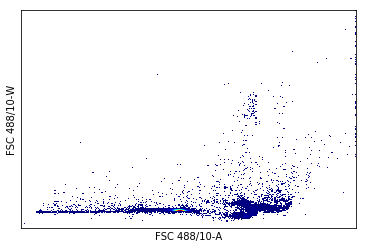

In [7]:
ag.plotHeatmap(fcs(),"FSC 488/10-A","FSC 488/10-W",scale='logish')

In [4]:
no_clutter=ag.gateThreshold(fcs(),"FSC-A", "FSC-H",thresh=260000, orientation='horisontal',population="lower", plot=False)

After gating, 499919 out of 500000 events remain.


In [5]:
singlets=ag.gatePC(fcs(),"FSC-A", "FSC-H",center='density',widthScale=4, heightScale=4, vI=no_clutter, plot=False)

After gating, 481258 out of 499919 events remain.


In [6]:
fcs.update(ag.AGgate(singlets, fcs.full_index()),"singlets","total")

In [7]:
fcs.report()

Gating report for B cells_A11_A11_033 (500000 total events)
1 gate(s):
singlets (481258 events)



In [8]:
fcs.printStats("/media/ludvig/Project_Storage/GAIM/test_out.txt")